# Assignment 5 - Glass Identification Dataset

## https://archive.ics.uci.edu/ml/datasets/Glass+Identification

In [14]:
import numpy as np
import pandas as pd

## Import Glass Dataset

In [15]:
dataset=pd.read_csv("glass.data", header=None)

In [16]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
dataset.tail()

,0,1,2,3,4,5,6,7,8,9,10
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [18]:
dataset.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [19]:
dataset.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

In [20]:
dataset.shape

(214, 11)

In [21]:
x=dataset.iloc[:, 1:10]

In [22]:
x

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
y=dataset.iloc[:,10]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: 10, Length: 214, dtype: int64

## Variance by - Dendrogram 

In [25]:
import plotly.figure_factory as ff

In [26]:
fig = ff.create_dendrogram(dataset)
fig.update_layout(width=800, height=500)
fig.show()

In [27]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [28]:
 from id3 import Id3Estimator, export_text

In [30]:
estimator = Id3Estimator()
estimator.fit(x,y)

Id3Estimator()

In [32]:
print(export_text(estimator.tree_, ['RI','Na','Mg', 'AI', 'Si','K', 'Ca', 'Ba', 'Fe']))


Mg <=2.70
|   Na <=13.78
|   |   AI <=1.38
|   |   |   RI <=1.52: 7 (1) 
|   |   |   RI >1.52: 2 (7) 
|   |   AI >1.38
|   |   |   Fe <=0.09: 5 (10) 
|   |   |   Fe >0.09
|   |   |   |   RI <=1.52: 5 (1) 
|   |   |   |   RI >1.52
|   |   |   |   |   Si <=72.79: 2 (4) 
|   |   |   |   |   Si >72.79: 5 (1) 
|   Na >13.78
|   |   Ba <=0.20
|   |   |   RI <=1.52: 6 (9) 
|   |   |   RI >1.52
|   |   |   |   AI <=1.85: 2 (2) 
|   |   |   |   AI >1.85: 7 (1) 
|   |   Ba >0.20
|   |   |   AI <=3.19: 7 (24) 
|   |   |   AI >3.19: 5 (1) 
Mg >2.70
|   AI <=1.42
|   |   RI <=1.52
|   |   |   Si <=72.72: 3 (5) 
|   |   |   Si >72.72
|   |   |   |   Na <=13.35
|   |   |   |   |   Ca <=8.59
|   |   |   |   |   |   K <=0.60: 3 (2/1) 
|   |   |   |   |   |   K >0.60: 1 (2) 
|   |   |   |   |   Ca >8.59: 2 (2) 
|   |   |   |   Na >13.35: 2 (2) 
|   |   RI >1.52
|   |   |   K <=0.29
|   |   |   |   Si <=71.25: 2 (2) 
|   |   |   |   Si >71.25
|   |   |   |   |   Fe <=0.20
|   |   |   |   |   |   Ca <=9.

In [17]:
from id3 import export_graphviz

In [18]:
export_graphviz(estimator.tree_, "glass.dot", ['RI','Na','Mg', 'AI', 'Si','K', 'Ca', 'Ba', 'Fe'])

<_io.TextIOWrapper name='glass.dot' mode='w' encoding='utf8'>

In [19]:
#!pip install decision-tree-id3

In [20]:
#!dot -T png glass.dot -o glass.png

## Hierarchical clustering of Glass on Potassium & Calcium

In [21]:
# Data of only two Potasium and Calcium

x_temp=[x.iloc[:,5],x.iloc[:,6]]
# x_temp
x_pc=pd.concat(x_temp,axis=1)

In [22]:
x_pc

,6,7
0,0.06,8.75
1,0.48,7.83
2,0.39,7.78
3,0.57,8.22
4,0.55,8.07
...,...,...
209,0.08,9.18
210,0.00,8.40
211,0.00,8.44
212,0.00,8.48


In [23]:
## Find the number of Clusters

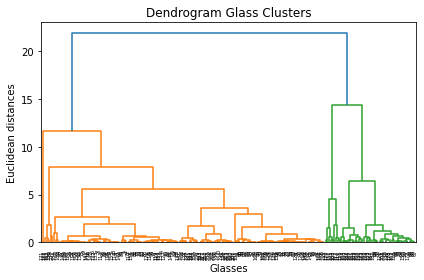

In [24]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram =  sch.dendrogram(sch.linkage(x_pc, method = 'ward'))
plt.title('Dendrogram Glass Clusters')
plt.xlabel('Glasses')
plt.ylabel('Euclidean distances')
plt.tight_layout()

In [25]:
# Agglomerative Clustering Approach
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage= 'ward')

In [26]:
y_hc = hc.fit_predict(x_pc)
print(y_hc)
#print(dataset)
# print(x_pc[y_hc==0,0])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 0 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 4 0 0 0 0 0 0 2 3 3 2 0 0 0 0 0 0 1 0 0 0 1
 4 4 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 4 0 1 1 1 1 1]


In [27]:
# plt.figure(figsize=(20,10))
# plt.scatter(x_pc[y_hc==0,0], x_pc[y_hc==0,1], c='red', label= '')
# plt.scatter(x_pc[y_hc==1,0], x_pc[y_hc==1,1], c='green', label= '')
# plt.scatter(x_pc[y_hc==2,0], x_pc[y_hc==2,1], c='blue', label= '')
# plt.scatter(x_pc[y_hc==3,0], x_pc[y_hc==3,1], c='black', label= '')
# plt.scatter(x_pc[y_hc==4,0], x_pc[y_hc==4,1], c='yellow', label= '')
# plt.title('Glass Clustering (Hierarchical)')
# plt.xlabel('Potassium')
# plt.ylabel('Calcium')

# plt.legend(loc='best')
# #plt.show()
# plt.tight_layout()

## CART on Glass Identification

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(x,y)

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt

In [30]:
from sklearn.tree import export_graphviz

In [31]:
# feature_names = ['RI','Na','Mg', 'AI', 'Si','K', 'Ca', 'Ba', 'Fe']
# out = ['BWFP','BWNFP', 'VWFP', 'VWNFP', 'Containers', 'Tableware', 'Headlamps']
# dot = export_graphviz(decision_tree = model, out_file='gl.dot', feature_names = feature_names, class_names = out)


In [32]:
# !dot -T png gl.dot -o glassCART.png

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.20, random_state=0)

In [34]:
model.predict(x_test)

array([7, 1, 2, 6, 5, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 7, 2, 1, 3, 3, 5, 2,
       7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 7, 2, 6, 2],
      dtype=int64)

In [35]:
x.dtypes

1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [36]:
x.iloc[:,0]

0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: 1, Length: 214, dtype: float64

In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: 10, Length: 214, dtype: int64

## KMeans Clustering Glass identification on various factors

Text(0, 0.5, 'RI')

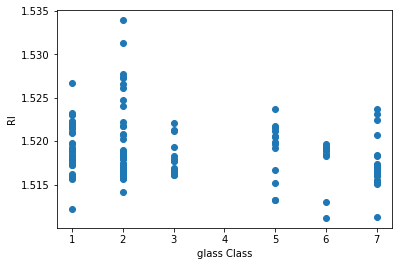

In [38]:
# Scatter lot Glass Iron containt againt the Refractive Index of glass
plt.scatter(y,x.iloc[:,0])
plt.xlabel('glass Class')
plt.ylabel('RI')

In [39]:
## Create KMeans model and fit data (x) in to model

In [40]:
# Cluster on Sodium and Magnesium
x_temp=[x.iloc[:,1],x.iloc[:,2]]
x1=pd.concat(x_temp,axis=1)
x1

,2,3
0,13.64,4.49
1,13.89,3.60
2,13.53,3.55
3,13.21,3.69
4,13.27,3.62
...,...,...
209,14.14,0.00
210,14.92,0.00
211,14.36,0.00
212,14.38,0.00


In [41]:
## Create KMeans model and fit data (x) in to model
# Initialize K-means Model

from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
# Train the model (it is unsupervised learning) if it was supervised it would be fit(x,y)
km.fit(x1)

KMeans(n_clusters=3)

In [42]:
# Cluster centers
centers=km.cluster_centers_
centers

array([[13.2795625 ,  3.477625  ],
       [14.52162162,  0.28891892],
       [12.19117647,  0.43411765]])

In [43]:
# Compare clster labels and actual glass class
print(km.labels_)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 2 2 1 2 2 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]
0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: 10, Length: 214, dtype: int64


In [44]:
# nlabels=km.labels_
# fig,axes=plt.subplots(1,2,figsize=(16,8))
# axes[0].scatter(x1[:,0],x1[:,1], c=y)
# axes[0].set_title("Actual Class")
# axes[0].set_xlabel('Sepal Length')
# axes[0].set_ylabel('Sepal Width')
# axes[1].scatter(x1[:,0],x1[:,1], c=nlabels)
# axes[1].set_title("Predicted Clustering")
# axes[1].set_xlabel('Sepal Length')
# axes[1].set_ylabel('Sepal Width')

In [45]:
# Range of the score is -1 to 1, 1 being the best -1 be the worst , it also works on random sample
from sklearn.metrics import adjusted_rand_score
result=adjusted_rand_score(km.labels_,y)
result

0.24289827123056734

In [46]:
# higher the score better the prediction - done on random pairs of Actual-Predicted
from sklearn import metrics
fowlkes_score = metrics.fowlkes_mallows_score(km.labels_,y)
print(fowlkes_score)

0.561141288473896


## KNN Classifier of Glass Identification

In [47]:
from sklearn.model_selection import train_test_split

# split data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [48]:
# Creat Model and Fit in
from sklearn.neighbors import KNeighborsClassifier

n1=KNeighborsClassifier()
n1.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
# Predict Class
predictions=n1.predict(x_test)
print(predictions)

[7 1 2 6 2 2 1 2 2 2 2 1 1 2 2 7 1 2 1 1 5 1 7 1 1 1 7 1 2 2 1 1 2 1 1 1 1
 1 2 7 2 2 2]


In [50]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, predictions)
print(matrix)

[[ 6  3  0  0  0  0]
 [ 7 12  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 1  0  0  0  0  5]]


In [51]:
from sklearn.metrics import accuracy_score
a_socre=accuracy_score(y_test,predictions)
print(a_socre)

0.5813953488372093


## SVM Linear Model on Glass Identification

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [53]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred=model.predict(x_test)

In [55]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.89      0.52         9
           2       0.58      0.37      0.45        19
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.51        43
   macro avg       0.38      0.46      0.40        43
weighted avg       0.48      0.51      0.46        43

0.5116279069767442
[[ 8  1  0  0  0  0]
 [11  7  0  1  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]


D:\instldsft\anacondainstld\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## SVM Polynomial Model on Glass identification

* Degree of Polynomial 1

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [57]:
pmodel=SVC(kernel='poly', degree=1)
pmodel.fit(x_train,y_train)
y_pred=pmodel.predict(x_test)

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

0.20930232558139536
[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]


D:\instldsft\anacondainstld\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



* Degree of Polynomial 2

In [59]:
pmodel=SVC(kernel='poly', degree=2)
pmodel.fit(x_train,y_train)
y_pred=pmodel.predict(x_test)

In [60]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

0.20930232558139536
[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]


D:\instldsft\anacondainstld\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



* Degree of Polynomial is 5

In [61]:
pmodel=SVC(kernel='poly', degree=5)
pmodel.fit(x_train,y_train)
y_pred=pmodel.predict(x_test)

In [62]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

0.20930232558139536
[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]


D:\instldsft\anacondainstld\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



* Degree of polynomial is 10

In [63]:
pmodel=SVC(kernel='poly', degree=10)
pmodel.fit(x_train,y_train)
y_pred=pmodel.predict(x_test)

In [64]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.50      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.71      0.83      0.77         6

    accuracy                           0.37        43
   macro avg       0.25      0.32      0.23        43
weighted avg       0.38      0.37      0.28        43

0.37209302325581395
[[ 9  0  0  0  0  0]
 [17  2  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  1  0  0  0  1]
 [ 1  0  0  0  0  1]
 [ 0  1  0  0  0  5]]


D:\instldsft\anacondainstld\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



* Degree of Polynomial is 20

In [65]:
pmodel=SVC(kernel='poly', degree=20)
pmodel.fit(x_train,y_train)
y_pred=pmodel.predict(x_test)

In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.38      0.89      0.53         9
           2       0.57      0.42      0.48        19
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.53        43
   macro avg       0.41      0.47      0.42        43
weighted avg       0.50      0.53      0.49        43

0.5348837209302325
[[ 8  1  0  0  0  0]
 [10  8  0  1  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]


D:\instldsft\anacondainstld\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



 * Plot of Accuracy Score for Each Degree of SVM Polynomial

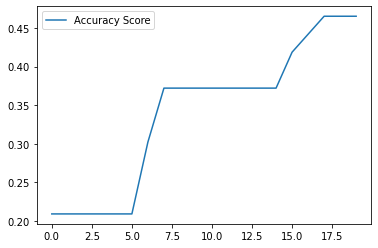

In [76]:
accuracy_log_pol=[]

for i in range(20):
    pmodel=SVC(kernel='poly', degree=i)
    pmodel.fit(x_train,y_train)
    y_pred=pmodel.predict(x_test)
    accuracy_log_pol.append(accuracy_score(y_test,y_pred))

# print(accuracy_log_pol)
df_accuracy_log_pol=pd.DataFrame(accuracy_log_pol)
df_accuracy_log_pol.columns=['Accuracy Score']
df_accuracy_log_pol.plot.line()
    